# NBCU Dataset - Exploratory Analysis

## Questions:

* What variables predict gross profit ?
 * Budget
 * Keywords
 * Directors 
 * Actors
 * Release date >> Time of the year too
 * Metacritics (pre-release reflection of quality)
 * IMBD Ratings (post-release reflection of quality)

## Definitions:

What is a ___ ?
- Four main categories: 
    1. big-budget AND flop 
    2. big-budget AND success
    3. small-budget AND smash
    4. small-budget AND flop

How I categorized them:
- Big-budget(blockbuster): budget >= $45,000,000
- A flop: gross < budget

## What I have discovered through Python so far:

In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame, Series

In [6]:
%matplotlib inline

In [7]:
data = pd.read_csv('NBCU data.csv')

In [8]:
box = 'box_office_gross_tfed' 

In [9]:
#Test merging arrays together
# s1 = pd.Series(['a','a','a','a','a','a'])
# s2 = pd.Series([5,6,7,8,9,9])
# result = pd.concat([s1, s2], axis=0)
# result.values

In [14]:
string = " "
for i in data.columns:
    string = string + i + " "
print(string) 

 imdbid title plot rating imdb_rating metacritic dvd_release production actors imdb_votes poster director release_date release_year real disposable income (average) release_month release_season runtime genre drama comedy action adventure romance thriller crime horror mystery fantasy sci-fi biography family animation documentary awards keywords budget box_office_gross_tfed 


In [21]:
des_box_gross = data[box].describe()
des_box_gross = pd.Series(map(lambda x: "{:,.3f}".format(x),des_box_gross.values),index=des_box_gross.index)

count          2,790.000
mean      44,346,284.122
std       74,730,715.884
min                2.000
25%        1,187,145.500
50%       16,207,126.000
75%       54,620,451.750
max      936,662,225.000
dtype: object

In [22]:
keywords_all = data['keywords'].astype(str)
#Define blockbusters as films that had budgets over $45,000,000
keywords_bus = keywords_all[data['budget'] >= 45000000]
string_all = "|".join(keywords_all)
string_bus = "|".join(keywords_bus)

In [30]:
keywords_all.head(4)

0    reboot|actor-reprises-previous-role|obesity|cl...
1    paraplegic|avatar|marine|native|future|ecology...
2    ship|iceberg|main-character-dies|one-word-titl...
3    dinosaur|jurassic-park|velociraptor|experiment...
Name: keywords, dtype: object

## Split one big string into seperate values

In [29]:
#turn into DataFrames for descriptive stats
all_key = pd.Series(string_all.split(sep="|"))
bus_key = pd.Series(string_bus.split(sep="|"))

In [32]:
all_key.value_counts().head(10)

murder                       858
death                        851
bare-chested-male            773
flashback                    760
husband-wife-relationship    754
blood                        713
violence                     711
father-son-relationship      704
title-spoken-by-character    666
mother-son-relationship      609
dtype: int64

In [11]:
bus_key.value_counts().head(20)

explosion                    296
death                        284
murder                       278
flashback                    265
no-opening-credits           264
violence                     260
pistol                       240
chase                        239
surprise-ending              236
shot-in-the-chest            234
bare-chested-male            232
rescue                       231
title-spoken-by-character    222
father-son-relationship      216
blood                        215
falling-from-height          212
revenge                      208
deception                    206
shot-to-death                206
escape                       199
dtype: int64

In [35]:
# Get data into a text file for input into WordArt application
file = open('blockbuter_keywords.txt','w')
blockbuster_key = " ".join(bus_key)
blockbuster_key = blockbuster_key.replace("-","~")

file.write(blockbuster_key)
file.close()

### How does this look in a word cloud ?

In [34]:
%%HTML
<img src="https://i.ibb.co/XFJjNSk/wordart.png" width="30%" height='auto'>

In [36]:
imbd = data['imdb_rating']
meta = data['metacritic']

c:\users\linhd\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


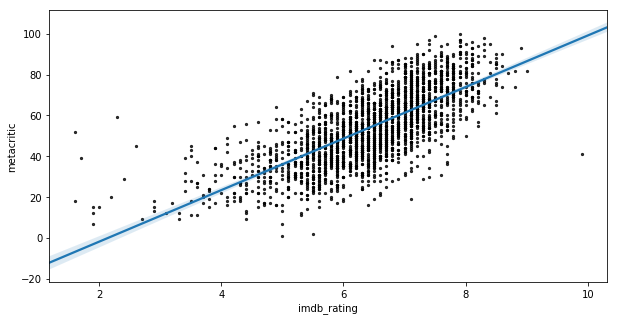

In [37]:
fig1 = plt.figure(figsize=(10, 5))
ax1 = sb.regplot(imbd,meta,scatter_kws={'s': 5, 'color': 'black'})

## Does ratings (quality) predict success ?

### 1. Define the four main categories

In [16]:
data['budget'].describe().map(lambda x: "{:,.2f}".format(x))

count          2,541.00
mean      36,652,278.04
std       45,708,004.86
min               44.00
25%        6,600,000.00
50%       20,000,000.00
75%       45,000,000.00
max      260,000,000.00
Name: budget, dtype: object

In [17]:
#Define blockbusters as those whose budgets >= 45,000,000; and small budget films the reverse
#BA: blockbuster = data[data['box_office_gross_tfed'] > 55000000]
blockbuster = data[data['budget'] >= 45000000]
small = data[data['budget'] < 45000000]

#Define blockbuster flops
big_flop = blockbuster[blockbuster['box_office_gross_tfed'] < blockbuster['budget']]

#Define blockbuster smash
big_success = blockbuster[blockbuster['box_office_gross_tfed'] > blockbuster['budget']]

#Define small budget flops
small_flop = small[small['box_office_gross_tfed'] < small['budget']]

#Define small budget gems
small_success = small[small['box_office_gross_tfed'] > small['budget']]

### 2. Blockbusters in general

Stats on IMDB ratings of blockbusters:


count    660.000000
mean       6.520000
std        0.956422
min        1.900000
25%        5.900000
50%        6.600000
75%        7.100000
max        9.000000
Name: imdb_rating, dtype: float64

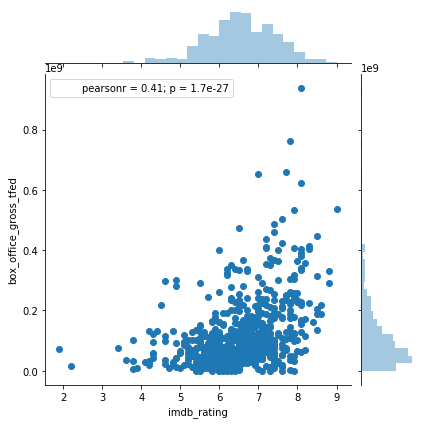

In [18]:
gross = data['box_office_gross_tfed']
#gross_buster = blockbuster['box_office_gross_tfed']
#meta_buster = blockbuster['metacritic']

sb.jointplot(x='imdb_rating', y='box_office_gross_tfed', data=blockbuster);
print('Stats on IMDB ratings of blockbusters:')
blockbuster['imdb_rating'].describe()

### 3. Big block flops vs Big block smashes

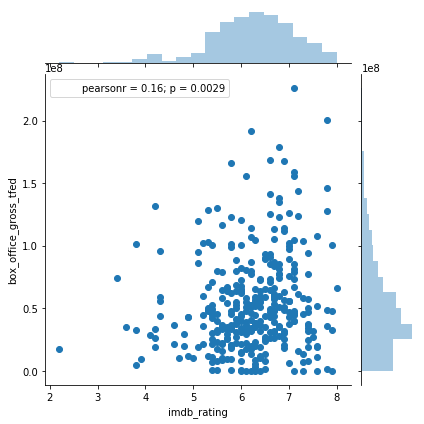

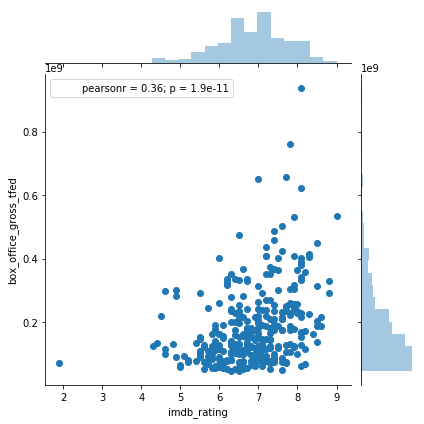

In [19]:
sb.jointplot(x='imdb_rating', y='box_office_gross_tfed', data=big_flop)
sb.jointplot(x='imdb_rating', y='box_office_gross_tfed', data=big_success);

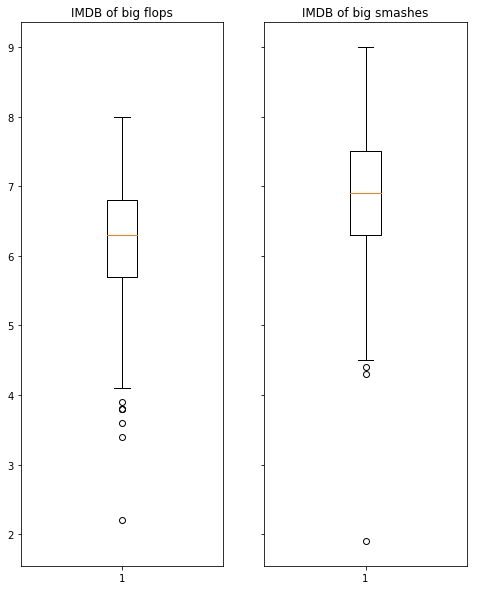

In [20]:
figb, (ax1, ax2) = plt.subplots(1,2,figsize=(8,10), sharey= True)
ax1.boxplot(big_flop['imdb_rating'].dropna())
ax1.set_title('IMDB of big flops')
ax2.boxplot(big_success['imdb_rating'].dropna())
ax2.set_title('IMDB of big smashes');

The boxplots and the descriptive stats below show that **IMDB scores** of successful big-budget movies are a little bit better.

In [21]:
print('Stats on IMDB ratings of blockbuster flops:')
big_flop['imdb_rating'].describe()

Stats on IMDB ratings of blockbuster flops:


count    340.000000
mean       6.223235
std        0.876178
min        2.200000
25%        5.700000
50%        6.300000
75%        6.800000
max        8.000000
Name: imdb_rating, dtype: float64

In [22]:
print('Stats on IMDB ratings of blockbuster successes:')
big_success['imdb_rating'].describe()

Stats on IMDB ratings of blockbuster successes:


count    320.000000
mean       6.835313
std        0.938235
min        1.900000
25%        6.300000
50%        6.900000
75%        7.500000
max        9.000000
Name: imdb_rating, dtype: float64

In [23]:
#fig2 = plt.figure(figsize=(10, 5))
#ax = sb.regplot(imbd,gross,scatter_kws={'s': 5, 'color': 'red'})

#fig5 = plt.figure(figsize=(10, 5))
#ax = sb.regplot(meta,gross,scatter_kws={'s': 5, 'color': 'orange'})

### 4. Small budget winners and losers

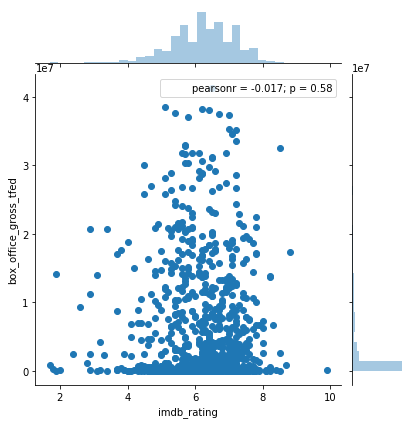

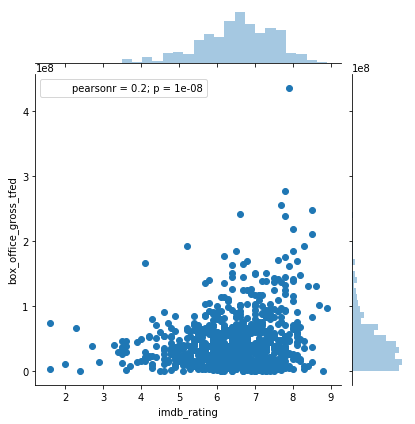

In [24]:
sb.jointplot(x='imdb_rating', y='box_office_gross_tfed', data=small_flop);
sb.jointplot(x='imdb_rating', y='box_office_gross_tfed', data=small_success);

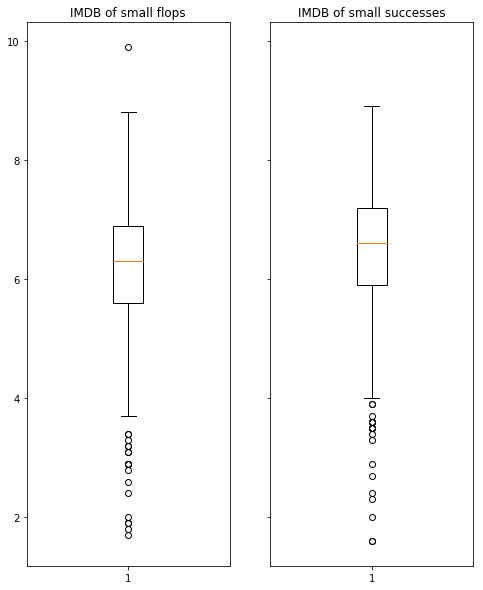

In [25]:
figs, (ax1, ax2) = plt.subplots(1,2,figsize=(8,10), sharey= True)
ax1.boxplot(small_flop['imdb_rating'].dropna())
ax1.set_title('IMDB of small flops')
ax2.boxplot(small_success['imdb_rating'].dropna())
ax2.set_title('IMDB of small successes');

> The boxplots and the descriptive stats below show that **IMDB scores** of successful small-budget movies are also a little bit better.

In [26]:
small_flop['imdb_rating'].describe()

count    1041.000000
mean        6.204419
std         1.023474
min         1.700000
25%         5.600000
50%         6.300000
75%         6.900000
max         9.900000
Name: imdb_rating, dtype: float64

In [27]:
small_success['imdb_rating'].describe()

count    822.000000
mean       6.460706
std        1.084303
min        1.600000
25%        5.900000
50%        6.600000
75%        7.200000
max        8.900000
Name: imdb_rating, dtype: float64


## Genre Analysis

In [28]:
genre = data['genre'].astype(str)

In [29]:
string_genre = ",".join(genre)
string_genre = string_genre.replace(" ","")
genre_key = pd.Series(string_genre.split(sep=','))
genre_key.value_counts();

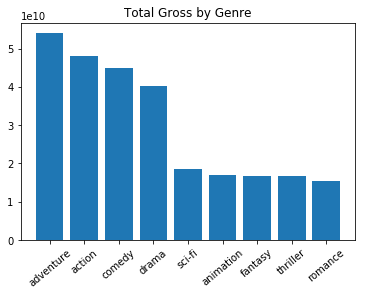

In [30]:
animation = data[data['animation']== 1]
action = data[data['action']== 1]
drama = data[data['drama']== 1]
romance = data[data['romance']== 1]
adventure =data[data['adventure']== 1]
thriller = data[data['thriller']== 1]
fantasy = data[data['fantasy']== 1]
documentary = data[data['documentary']== 1]
biography = data[data['biography']== 1]
comedy = data[data['comedy']== 1]
scifi = data[data['sci-fi']== 1]

ray = [adventure,action,comedy,drama,scifi,animation,fantasy,thriller,romance]
f_sum = [] 
for i in ray:
    f_sum += [i['box_office_gross_tfed'].sum()]


genre_label = ['adventure','action','comedy','drama','sci-fi','animation','fantasy','thriller','romance']
gross_genre = pd.Series(f_sum,index=range(1,10))

plt.bar(gross_genre.index, gross_genre.values)
plt.xticks(range(1,10), genre_label, rotation=40)
plt.title('Total Gross by Genre');

In [31]:
gross_genre.index = genre_label

In [32]:
f_mean = [] 
for i in ray:
    f_mean += [i['box_office_gross_tfed'].mean()]
    
gross_genre_mean = pd.Series(f_mean,index=genre_label)

adventure    109,189,791.13
action        79,314,941.09
comedy        45,265,561.15
drama         28,396,461.75
sci-fi        95,575,797.97
animation    113,340,337.77
fantasy       79,842,750.07
thriller      36,483,960.84
romance       33,006,611.30
dtype: object

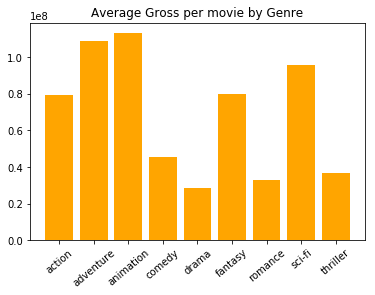

In [33]:
plt.bar(gross_genre_mean.index, gross_genre_mean.values, color='orange')
plt.xticks(rotation=40)
plt.title('Average Gross per movie by Genre')
gross_genre_mean.map(lambda x: "{:,.2f}".format(x))

> When we consider the average gross per movie, Scifi, Animation, and Fantasy become much more lucrative.

### Action and Adventures are similar in terms of keywords
Words that are more prominent in this genre than blockbusters in general

In [34]:
keywords_adv = adventure['keywords'].astype(str)
string_adv = "|".join(keywords_adv)
adv_key = pd.Series(string_adv.split(sep="|"))
adv_key.value_counts().head(20)

explosion                  199
rescue                     187
no-opening-credits         184
chase                      182
death                      179
violence                   175
murder                     166
falling-from-height        165
flashback                  163
escape                     160
fire                       154
character-name-in-title    151
martial-arts               147
battle                     147
knife                      146
surprise-ending            145
fight                      145
bare-chested-male          145
father-son-relationship    142
pistol                     142
dtype: int64

In [35]:
keywords_act = action['keywords'].astype(str)
string_act = "|".join(keywords_act)
act_key = pd.Series(string_act.split(sep="|"))
act_key.value_counts().head(25)

murder                 370
explosion              367
violence               366
pistol                 347
death                  330
shot-in-the-chest      320
shootout               314
shot-to-death          300
machine-gun            292
martial-arts           280
flashback              278
fistfight              276
blood                  273
chase                  273
bare-chested-male      268
held-at-gunpoint       265
punched-in-the-face    265
surprise-ending        264
knife                  262
revenge                259
falling-from-height    255
hand-to-hand-combat    254
rescue                 254
brawl                  252
shot-in-the-head       246
dtype: int64

### Comedy films focus on relationships and familiar settings


In [36]:
keywords_com = comedy['keywords'].astype(str)
string_com = "|".join(keywords_com)
com_key = pd.Series(string_com.split(sep="|"))
com_key.value_counts().head(20)

friendship                           245
father-son-relationship              243
husband-wife-relationship            242
title-spoken-by-character            234
bare-chested-male                    217
mother-son-relationship              206
character-name-in-title              199
kiss                                 192
father-daughter-relationship         184
dancing                              184
dog                                  181
cell-phone                           178
flashback                            176
restaurant                           173
family-relationships                 170
boyfriend-girlfriend-relationship    169
party                                168
mother-daughter-relationship         162
female-nudity                        151
bar                                  150
dtype: int64

### Drama emphasizes relationships, but includes many action elements


Many dramas can also be action or adventure movies (Logan, The Dark Night)

In [37]:
keywords_dram = drama['keywords'].astype(str)
string_dram = "|".join(keywords_dram)
dram_key = pd.Series(string_dram.split(sep="|"))
dram_key.value_counts().head(20)

husband-wife-relationship       490
death                           441
murder                          404
father-son-relationship         403
mother-son-relationship         395
bare-chested-male               390
flashback                       366
blood                           344
title-spoken-by-character       340
cigarette-smoking               318
photograph                      318
father-daughter-relationship    318
kiss                            309
family-relationships            305
friendship                      303
violence                        300
mother-daughter-relationship    297
hospital                        261
female-nudity                   255
bar                             253
dtype: int64

### Mixed-genre movies

In [38]:
action_adventure = action[action['adventure'] == 1]
action_drama = action[action['drama'] == 1]
action_comedy = action[action['comedy'] == 1]
action_scifi = action[action['sci-fi'] == 1]
action_fantasy = action[action['fantasy'] == 1]
action_anima = action[action['animation'] == 1]

mix_action = [action_adventure['box_office_gross_tfed'].mean(),
             action_drama['box_office_gross_tfed'].mean(),
             action_comedy['box_office_gross_tfed'].mean(),
            action_scifi['box_office_gross_tfed'].mean(),
             action_fantasy['box_office_gross_tfed'].mean(),
             action_anima['box_office_gross_tfed'].mean()]

In [39]:
for i in map(lambda x: "{:,.2f}".format(x),mix_action):
    print(i)

128,997,971.94
46,301,821.78
54,503,252.09
136,422,542.43
107,520,270.80
133,618,431.93


> **Action-Scifi** movies seem to gross more on average than other popular Action combinations. Hint: Star Wars, Avatar, etc) -> $136,422,542.43

> **Action Animation** is just as lucrative. Ex: How to train your dragons, Kungfu Pandas, Big Hero 6 -> $133,618,431.93

In [40]:
adventure_anima = adventure[adventure['animation']==1]
adventure_drama = adventure[adventure['drama'] ==1]
adventure_comedy = adventure[adventure['comedy'] ==1]
adventure_scifi = adventure[adventure['sci-fi'] ==1]
adventure_fantasy = adventure[adventure['fantasy'] ==1]

mix_adv = [action_adventure['box_office_gross_tfed'].mean(),
             adventure_anima['box_office_gross_tfed'].mean(),
             adventure_drama['box_office_gross_tfed'].mean(),
            adventure_comedy['box_office_gross_tfed'].mean(),
          adventure_scifi['box_office_gross_tfed'].mean(),
          adventure_fantasy['box_office_gross_tfed'].mean()]

for i in map(lambda x: "{:,.2f}".format(x),mix_adv):
    print(i)

128,997,971.94
125,639,205.89
72,237,133.72
92,629,393.58
193,329,469.12
139,465,085.47



> **Adventure sci-fi** movies seem to perform the best. Ex: Transformers, Star Wars, Star Trek, lots of superhero movies (Guardians of Galaxy, Iron Man, Avengers) -> $193,329,469.12

> Runners-up are **Adventure Fantasy** (139,465,085.47) and **Action Adventure** (128,997,971.94)  films.


In [41]:
drama_comedy = drama[drama['comedy'] ==1]
drama_scifi = drama[drama['sci-fi'] == 1]
drama_fantasy = drama[drama['fantasy'] == 1]

mix_dram = [drama_comedy['box_office_gross_tfed'].mean(),
            drama_scifi['box_office_gross_tfed'].mean(),
            drama_fantasy['box_office_gross_tfed'].mean()]

for i in map(lambda x: "{:,.2f}".format(x),mix_dram):
    print(i)

26,283,173.50
36,946,140.76
56,532,443.15


> **Drama combinations** do not gross as much as other combinations.

In [42]:
print('Average revenue per action film: ', "{:,.2f}".format(action[box].mean()))
print ('Average revenue per adventure film: ', "{:,.2f}".format(adventure[box].mean()))

Average revenue per action film:  79,314,941.09
Average revenue per adventure film:  109,189,791.13


**CONCLUSION**: Mixing Scifi with Action and Adventure makes for higher-grossing films.

# Economic Variables

## Budget

In [43]:
data_nona = data.dropna(subset=['budget'])

Pearson correlation and P-value


(0.70888526416766873, 0.0)

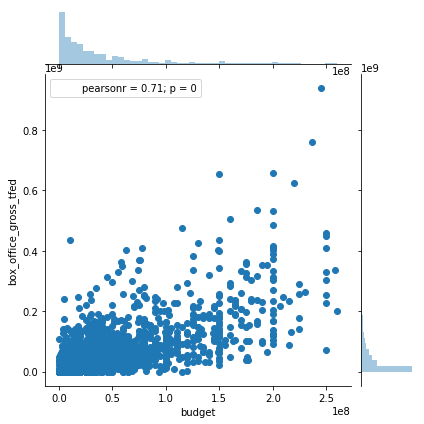

In [44]:
sb.jointplot(x='budget', y='box_office_gross_tfed', data = data_nona);
print('Pearson correlation and P-value')
sp.stats.pearsonr(data_nona['budget'],data_nona[box])

> There is **strong corellation** between the two budget and box office revenue.

> Budget is a good predictor of gross box office revenue.

### **(?)** Were big-budget bombs not big-budget enough ?

Ttest_indResult(statistic=-2.2889718319564318, pvalue=0.022393621108769114)

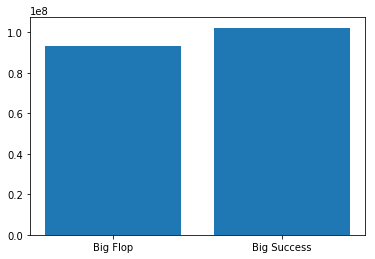

In [45]:
plt.bar(['Big Flop','Big Success'],[big_flop['budget'].mean(),big_success['budget'].mean()]);
sp.stats.ttest_ind(big_flop['budget'],big_success['budget'])

> p < 0.05

> The difference is statistically significant.

Ttest_indResult(statistic=-5.6565400598128956, pvalue=1.7832451526922741e-08)

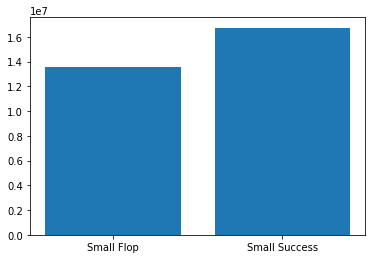

In [46]:
plt.bar(['Small Flop','Small Success'],[small_flop['budget'].mean(),small_success['budget'].mean()]);
sp.stats.ttest_ind(small_flop['budget'],small_success['budget'])

> p-value < 0.05

> The difference is statistically significant.

## Disposable Income and Box Office Gross

In [38]:
%%HTML
<img src="https://i.ibb.co/6JF2TVW/income-gross.png" alt="income-gross" border="0">

Total annual box office gross has not grown in the same pattern as disposable income.


In [39]:
%%HTML
<img src="https://i.ibb.co/gtPgTWf/income-gross-growth.png" alt="income-gross-growth" border="0">

I replaced annual disposable income with its growth rate. I assume that the quicker disposable income is growing, the more people will spend on movies. The data disproved my assumption, because in many years when disposable income didn't rise as quickly and even dropped, people didn't spend any less on movies.


## Seasonality

In [49]:
big_success_sea = big_success.groupby('release_month').mean()
small_success_sea = small_success.groupby('release_month').mean()
big_flop_season = big_flop.groupby('release_month').mean()
small_flop_season = small_flop.groupby('release_month').mean()

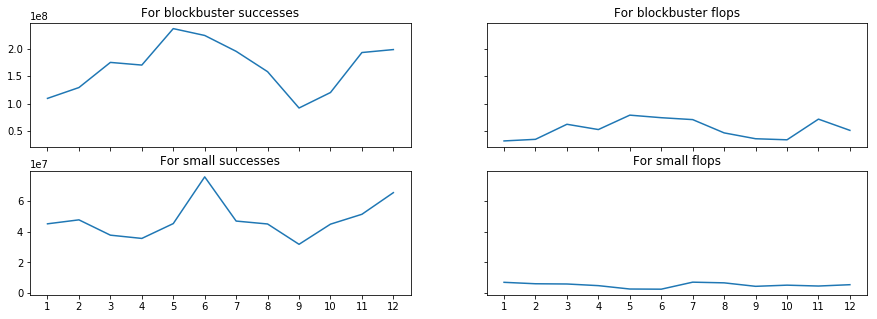

In [50]:
figf, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,5),sharex = 'col', sharey = 'row')
ax1.plot(big_success_sea.index,big_success_sea[box])
ax1.set_title('For blockbuster successes')
ax1.set_xticks(range(1,13))
ax2.plot(big_flop_season.index,big_flop_season[box])
ax2.set_title('For blockbuster flops')
ax3.plot(small_success_sea.index,small_success_sea[box])
ax3.set_title('For small successes')
ax4.plot(small_flop_season.index,small_flop_season[box])
ax4.set_title('For small flops')
ax4.set_xticks(range(1,13));

> **Average gross per month by four main categories**

> The charts show:
    - Being in-season increases box office gross for both winners and losers
    - There seem to be no significant rewards for being off-season for the 
      industry as a whole.
> They do not show:
    - That they failed because they had to compete with the successful ones. 

> Have to find other variables to explain underperformance

In [40]:
%%HTML
<img src="https://i.ibb.co/thw41TN/mean-month-gross1.png" alt="mean-month-gross1" border="0">

I tried to observe whether seasonal revenue flows change over time.
- Theaters, while still making most money in the summer, are increasing less reliant on summer for revenues. In 2016, Spring and Winter holidays can be just as good. 